<a href="https://colab.research.google.com/github/Pranava-17/telecomchurn/blob/main/Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA MANIPULATION AND EDA - EXPLORATORY DATA ANALYSIS
import pandas as pd
import numpy as np
# DATA VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.utils import shuffle  # sklearn : SCIKIT LEARN PYTHON LIBRARY

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFECV

from scipy.stats import chi2_contingency #  SCIPY: SCIENTIFIC PYTHON LIBRARY

from imblearn.over_sampling import RandomOverSampler, SMOTENC  # IMBALANCED DATA VARIABLES IN GIVEN DATASET

from collections import Counter  # TO FINDOUT OCCURRENCES OF FEATURES / VARIABLES IN A DATASET

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn-bigml-20.csv")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
666,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
df.describe()  # descriptive stats

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


#EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Churn', ylabel='count'>

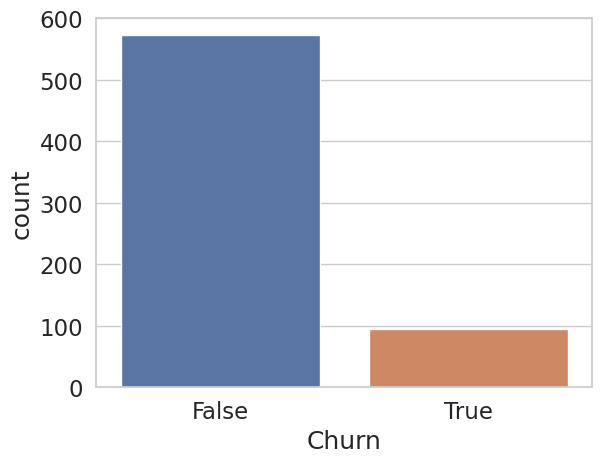

In [ ]:
sns.countplot(data = df, x = "Churn")

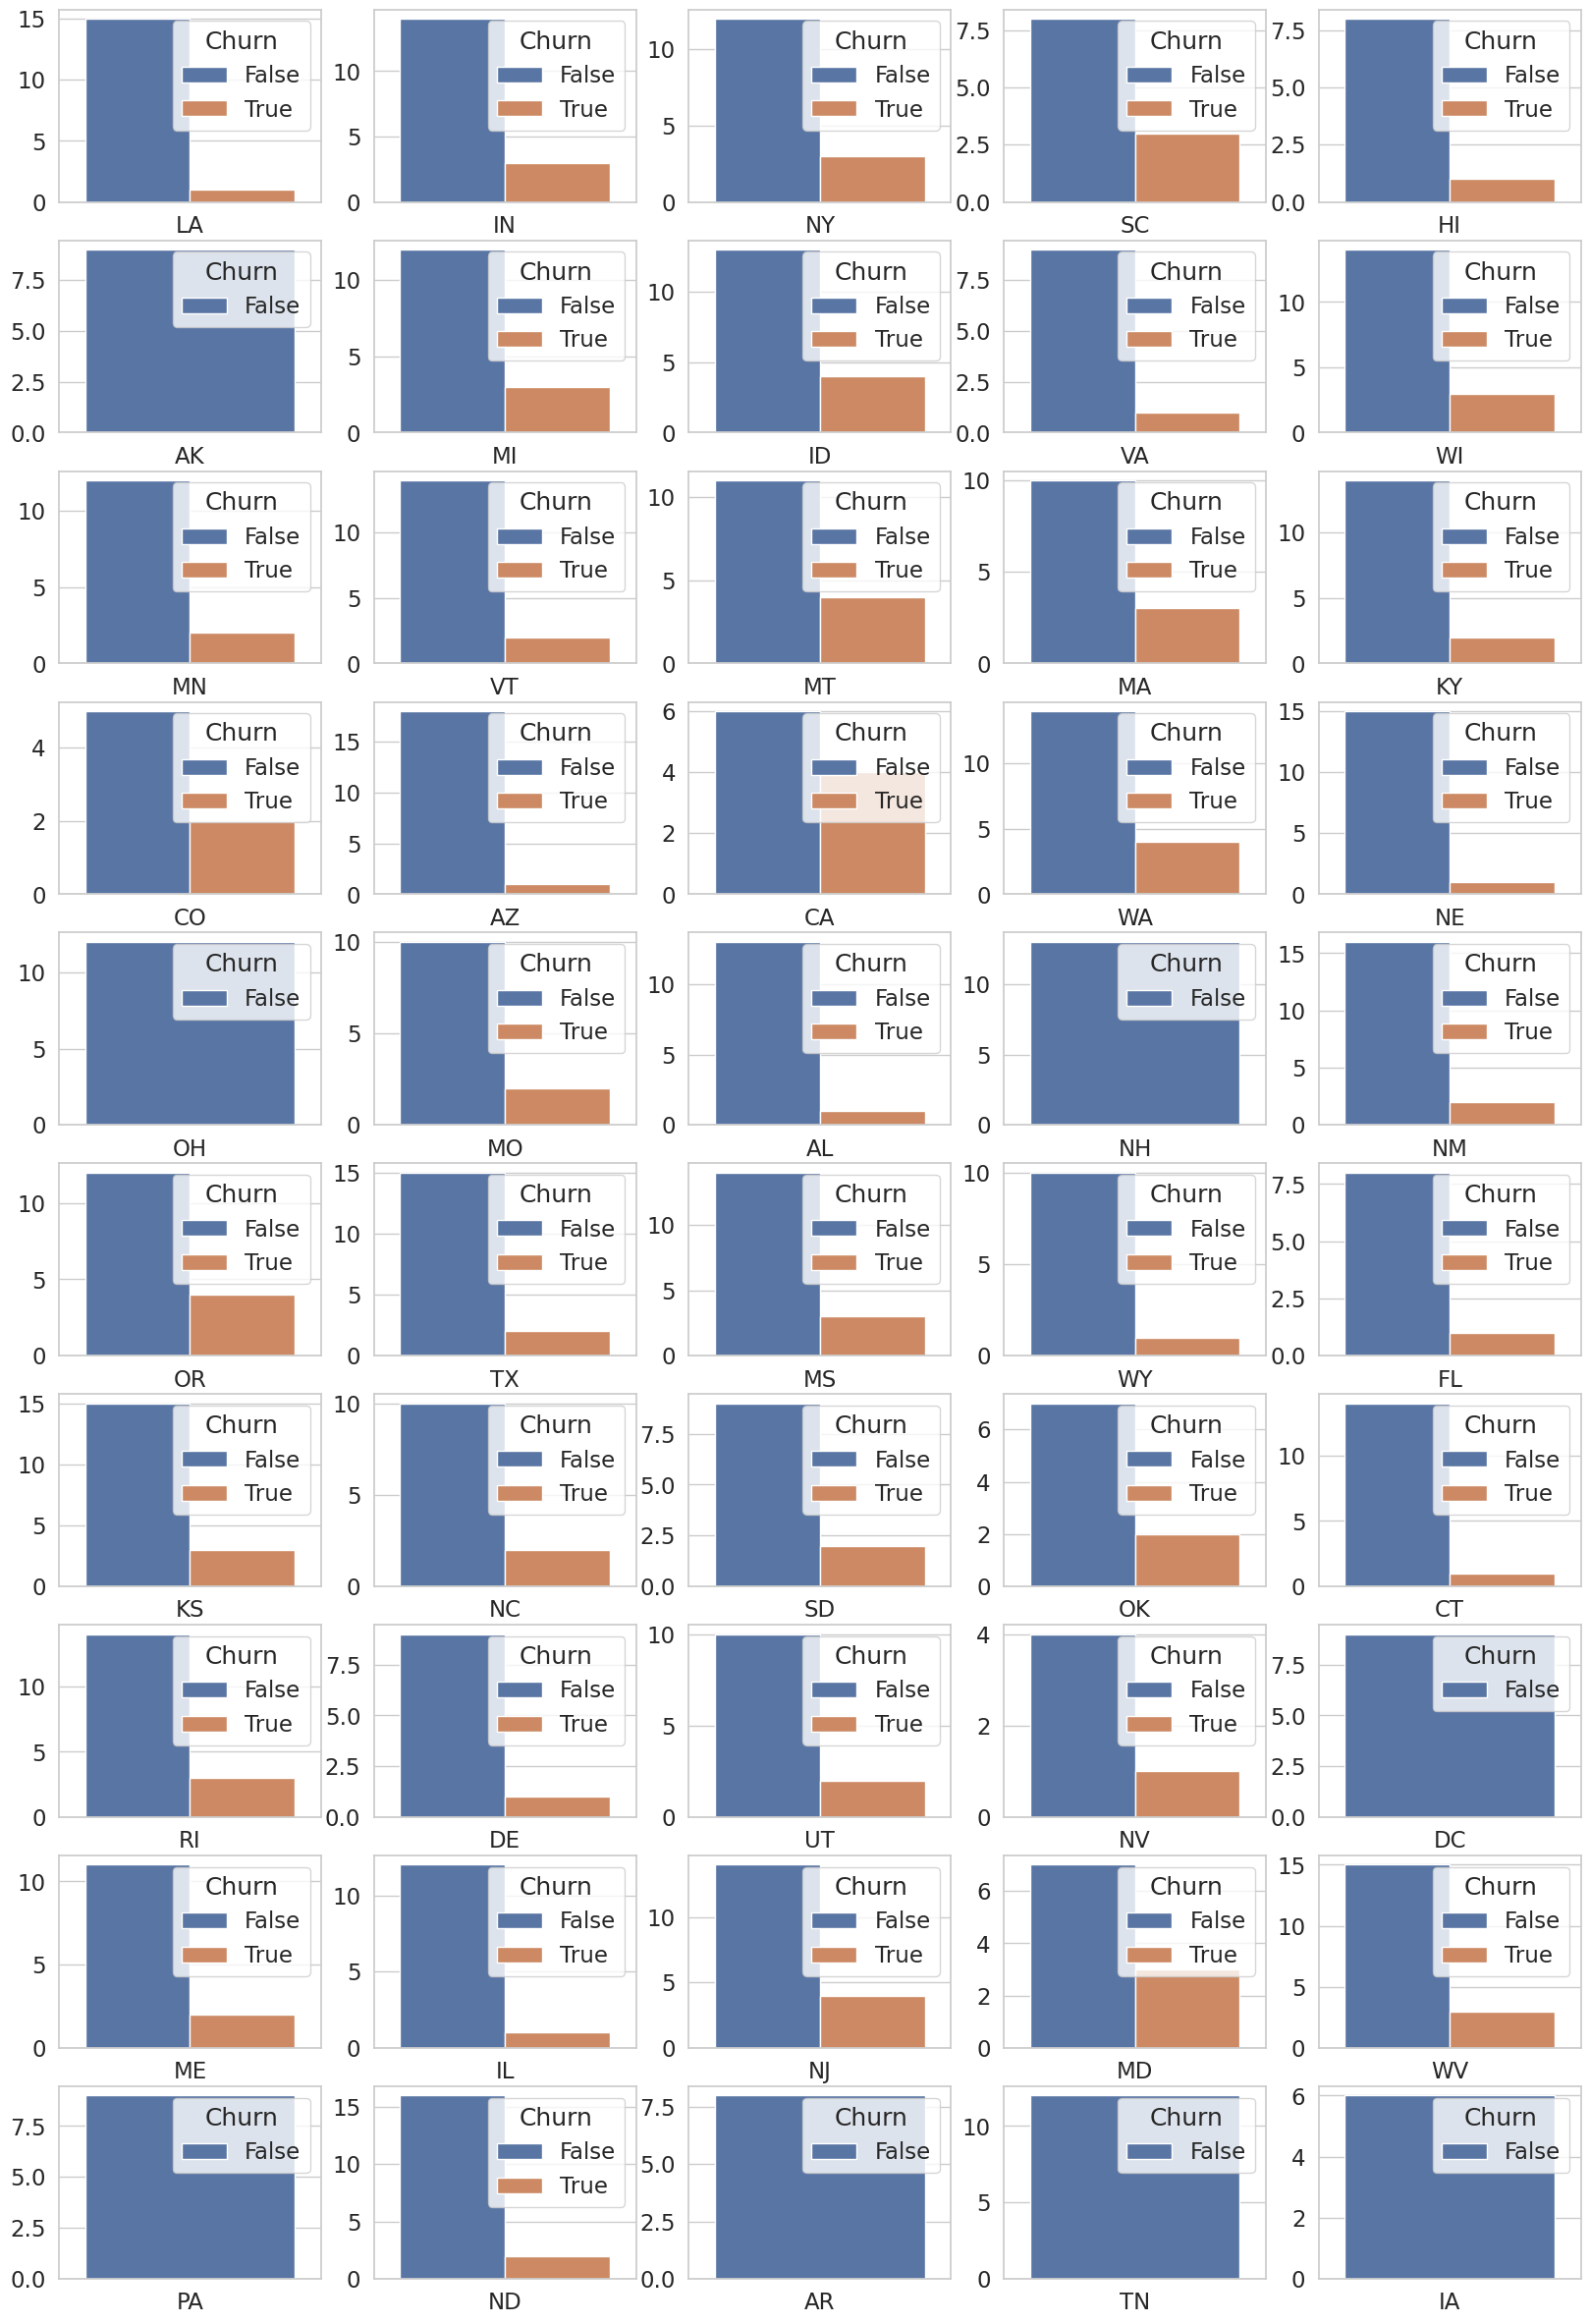

In [ ]:
fig, axes = plt.subplots(10,5,figsize = (20,30))

for i in range(len(df.State.unique())-1):
    # filter for that state
    state_data = df[df.State == df.State.unique()[i]]
    sns.countplot(data = state_data, x = "State", hue = "Churn", ax = axes[i//5,i%5])

    axes[i//5,i%5].set_ylabel("")
    axes[i//5,i%5].set_xlabel("")

In [ ]:
def chi_2_test(df, col2,col1 = "Churn"):
    data = pd.crosstab(df[col1], df[col2], rownames=[col1], colnames=[col2])
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print(f"{col2} and {col1} are dependant!")
    else :
        print(f"{col2} and {col1} are independant!")

In [ ]:
data = pd.crosstab(df["Churn"], df["State"], rownames=["churn"], colnames=["state"])
data

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,9,13,8,18,6,5,14,9,9,8,...,9,12,15,10,9,14,14,14,15,10
True,0,1,0,1,4,2,1,0,1,1,...,2,0,2,2,1,2,4,3,3,1


In [ ]:
df[["State","Churn"]]

,State,Churn
0,LA,False
1,IN,True
2,NY,True
3,SC,False
4,HI,False
...,...,...
662,WI,False
663,AL,False
664,VT,False
665,WV,False


In [ ]:
chi_2_test(df,"State")

p value is 0.8531402172587658
State and Churn are independant!


p>0.05 (alpha)  --> accept NULL HYPOTHESIS

In [ ]:
tab = pd.crosstab(df["Churn"], df["State"], rownames=['Churn'], colnames=['State'])
tab

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,9,13,8,18,6,5,14,9,9,8,...,9,12,15,10,9,14,14,14,15,10
True,0,1,0,1,4,2,1,0,1,1,...,2,0,2,2,1,2,4,3,3,1


In [ ]:
tab = pd.crosstab(df["Churn"], df["State"], rownames=['Churn'], colnames=['State'], normalize = "columns")
tab.T

Churn,False,True
State,,
AK,1.000000,0.000000
AL,0.928571,0.071429
AR,1.000000,0.000000
AZ,0.947368,0.052632
CA,0.600000,0.400000
CO,0.714286,0.285714
CT,0.933333,0.066667
DC,1.000000,0.000000
DE,0.900000,0.100000


In [ ]:
churn_more10 = list(tab.iloc[1][((tab.iloc[1] > 0.1) & (tab.iloc[1] < 0.2))].index)
churn_more20 = list(tab.iloc[1][(tab.iloc[1] > 0.2)].index)
churn_less10 = list(tab.iloc[1][tab.iloc[1] < 0.1].index)

In [ ]:
df["State"].replace(churn_less10,0, inplace = True)
df["State"].replace(churn_more10,1, inplace = True)
df["State"].replace(churn_more20,2, inplace = True)

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,1,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,2,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,1,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,1,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,0,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,1,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,1,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
666,0,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


<Axes: xlabel='State', ylabel='count'>

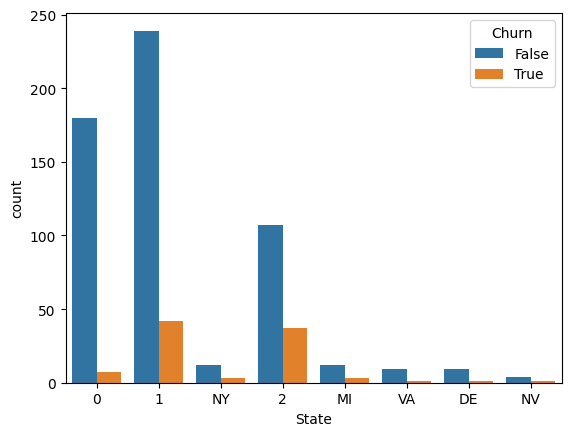

In [ ]:
sns.countplot(data = df, x = "State", hue = "Churn")

In [ ]:
chi_2_test(df,"State")

p value is 1.962683447109508e-05
State and Churn are dependant!


p<0.05 --> REJECT NULL HYPOTHESIS

<Axes: xlabel='International plan', ylabel='count'>

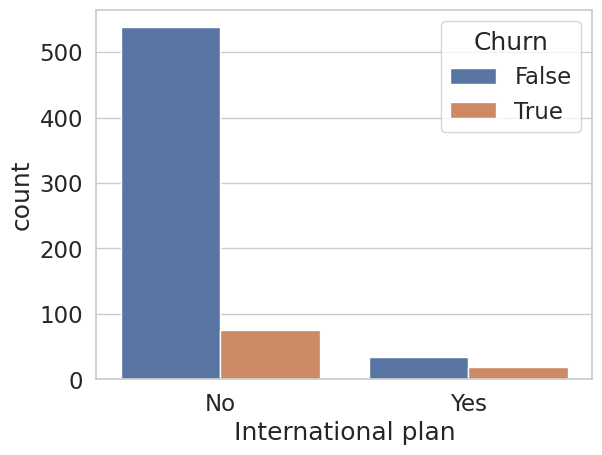

In [ ]:
sns.countplot(data = df, x = "International plan", hue = "Churn")

In [ ]:
chi_2_test(df,"International plan")

p value is 7.252983913050652e-06
International plan and Churn are dependant!


p<0.05 --> REJECT NULL HYPOTHESIS

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

<Axes: xlabel='Voice mail plan', ylabel='count'>

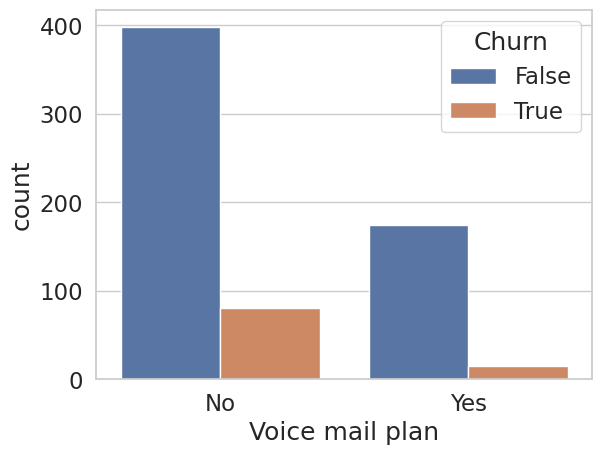

In [ ]:
sns.countplot(data = df, x = "Voice mail plan", hue = "Churn")


In [ ]:
chi_2_test(df,"Voice mail plan")

p value is 0.0049933761845949165
Voice mail plan and Churn are dependant!


[Text(0, 0, '129'),
 Text(0, 0, '213'),
 Text(0, 0, '126'),
 Text(0, 0, '74'),
 Text(0, 0, '21'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

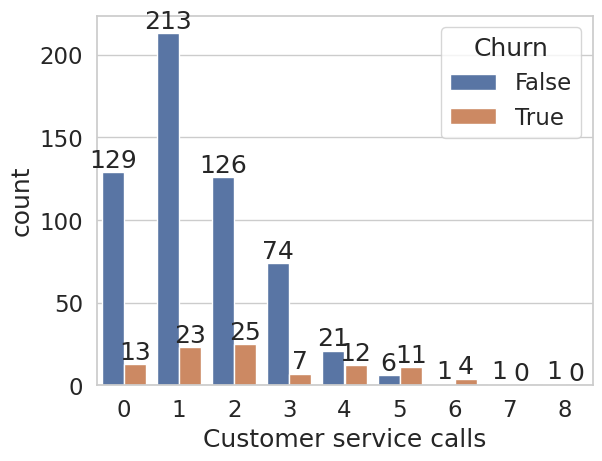

In [ ]:
ax = sns.countplot(data = df, x = "Customer service calls", hue = "Churn")
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])



In [ ]:
chi_2_test(df,"Customer service calls")

p value is 2.6395280333937337e-13
Customer service calls and Churn are dependant!


In [ ]:
df["Customer service calls"].values

array([1, 4, 4, 2, 1, 0, 3, 5, 2, 3, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 0, 2, 3, 1, 2, 2, 2, 2, 1, 1, 1, 0, 5, 0, 4,
       2, 0, 4, 1, 1, 2, 0, 3, 2, 2, 2, 2, 1, 0, 5, 1, 1, 0, 4, 1, 2, 2,
       1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 3, 2, 0, 4, 0, 0, 1,
       2, 3, 1, 3, 0, 1, 0, 0, 1, 2, 4, 3, 3, 2, 1, 0, 4, 0, 0, 3, 3, 2,
       5, 2, 1, 2, 2, 5, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 2, 3, 1, 2, 0, 3,
       5, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 3, 3, 3, 2, 3, 6, 1, 0, 2, 2,
       1, 6, 1, 2, 0, 1, 2, 2, 0, 5, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 1, 3, 2, 1, 3, 2, 4, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 4, 2, 2,
       0, 2, 3, 2, 3, 0, 3, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 4, 4, 1,
       0, 1, 1, 1, 1, 4, 0, 3, 3, 0, 1, 4, 3, 0, 0, 3, 1, 1, 5, 1, 0, 1,
       0, 2, 1, 3, 2, 0, 1, 0, 1, 1, 5, 0, 0, 2, 0, 1, 3, 4, 3, 1, 1, 0,
       4, 3, 2, 1, 0, 4, 0, 1, 2, 3, 4, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0, 4, 6, 1,

In [ ]:
df["Customer service calls"]=np.where(df["Customer service calls"] >= 4, 1,0 )



In [ ]:
df["Customer service calls"].values

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
chi_2_test(df,"Customer service calls")

p value is 3.224966032547221e-13
Customer service calls and Churn are dependant!


[Text(0, 0, '542'), Text(0, 0, '30')]

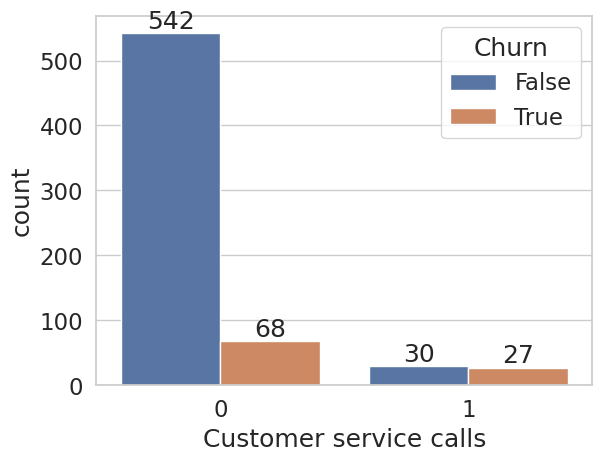

In [ ]:
ax = sns.countplot(data = df, x = "Customer service calls", hue = "Churn")
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])

[Text(0, 0, '141'), Text(0, 0, '296'), Text(0, 0, '135')]

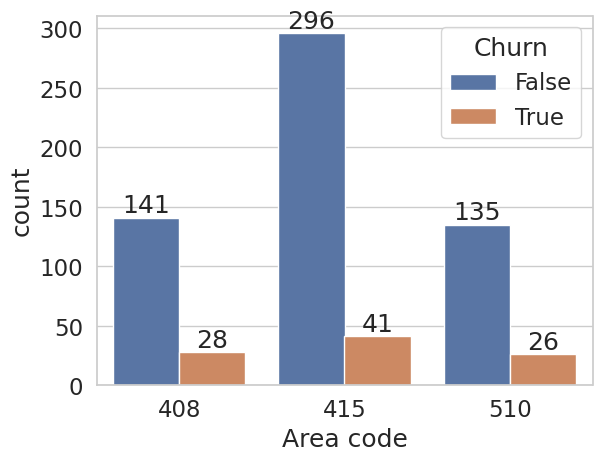

In [ ]:
ax = sns.countplot(data = df, x = "Area code", hue = "Churn")
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])



In [ ]:
chi_2_test(df,"Area code")

p value is 0.29865990250315466
Area code and Churn are independant!


In [ ]:
df.select_dtypes(exclude=[object]).dtypes


Account length              int64
Area code                   int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
79,56,78,75,65,85,88,        12,100

In [ ]:
num_cols = ["Account length",
    "Number vmail messages",
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge']

In [ ]:
1,2,3,4,5,

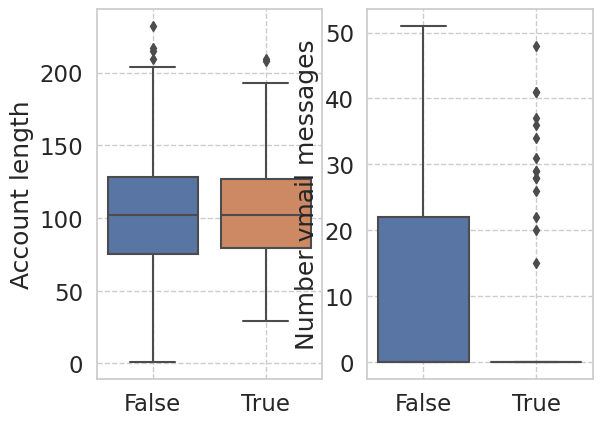

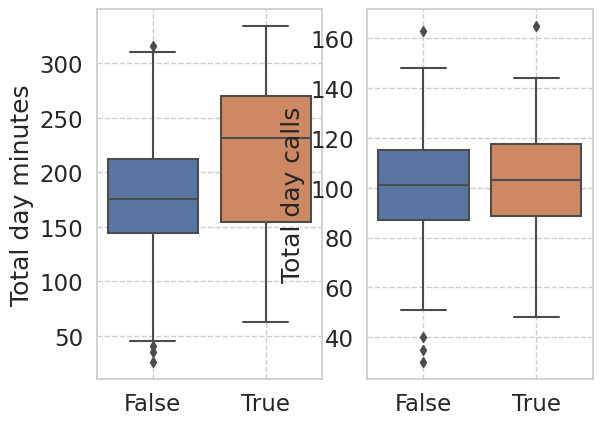

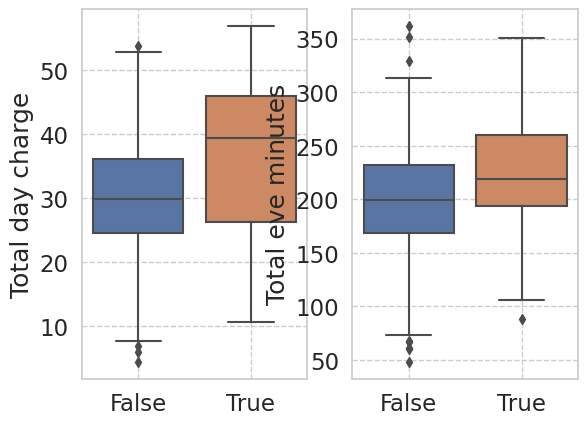

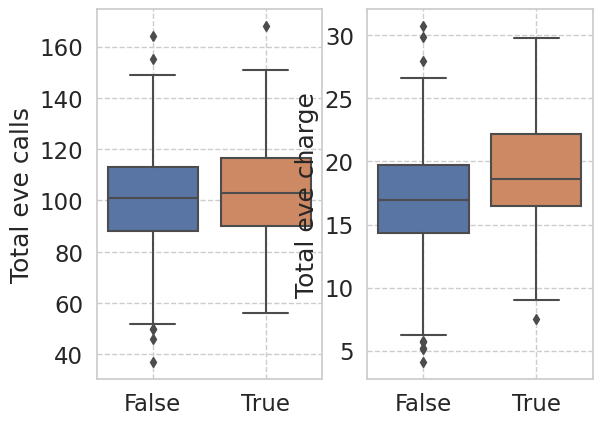

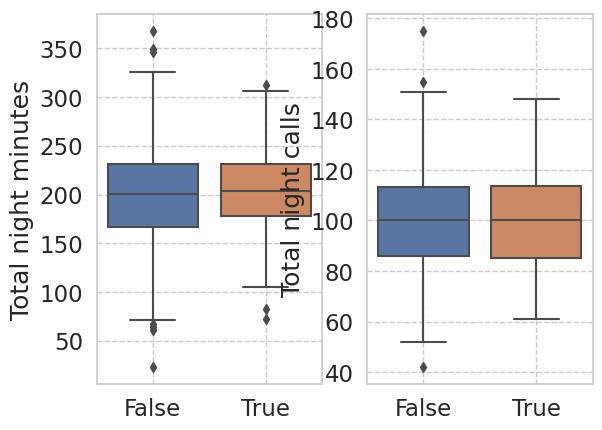

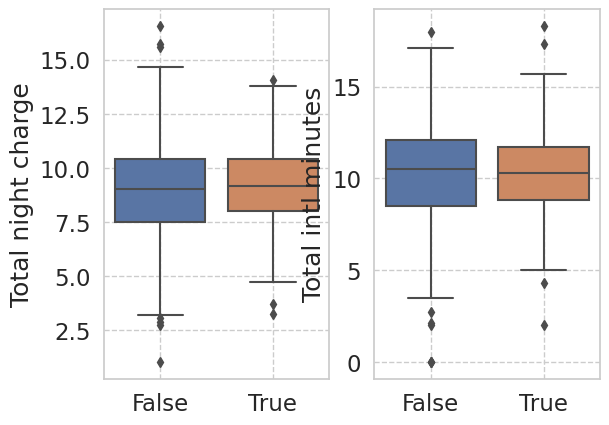

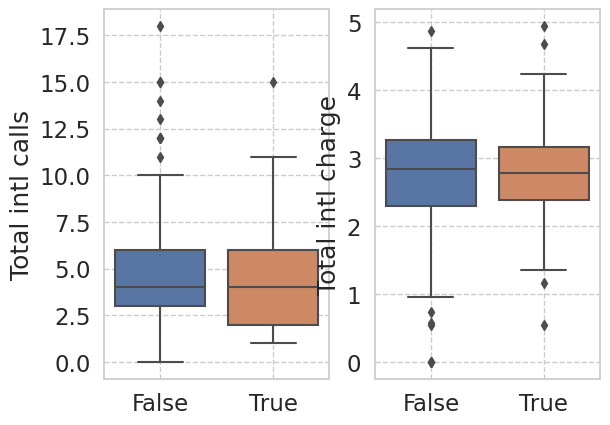

In [ ]:
for i in range(0,len(num_cols),2):
    fig,ax = plt.subplots(1,2)
    sns.boxplot(df,y = num_cols[i], x = "Churn",ax=ax[0])
    sns.boxplot(df,y = num_cols[i+1], x = "Churn",ax=ax[1])
    for ax in ax:
        ax.grid(True, which='both', linestyle='--')
        ax.set(xlabel='')

In [ ]:
def out_zscore(data):
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return set(outliers)

In [ ]:
for col in num_cols:
    print(f"Outliers of {col} are: ",out_zscore(df[col]))

Outliers of Account length are:  {232}
Outliers of Number vmail messages are:  {51}
Outliers of Total day minutes are:  set()
Outliers of Total day calls are:  {35, 163, 165, 30}
Outliers of Total day charge are:  set()
Outliers of Total eve minutes are:  {48.1, 361.8}
Outliers of Total eve calls are:  {168, 164, 37}
Outliers of Total eve charge are:  {4.09, 30.75}
Outliers of Total night minutes are:  {367.7, 349.7, 23.2}
Outliers of Total night calls are:  {175}
Outliers of Total night charge are:  {16.55, 1.04, 15.74}
Outliers of Total intl minutes are:  {0.0}
Outliers of Total intl calls are:  {12, 13, 14, 15, 18}
Outliers of Total intl charge are:  {0.0}


In [ ]:
df["Total day calls"].values

array([ 97, 137,  67, 103, 117, 128, 120, 114, 112,  70,  91, 109,  72,
       104, 100, 110,  72, 137,  99, 102,  91, 125, 125, 125,  91, 121,
       119, 116, 117,  87,  91,  87,  87, 103,  71,  67,  98,  72, 112,
       111,  84, 106, 148,  85, 114, 101, 126, 111, 110,  55, 104, 103,
        96,  97,  93,  90,  95, 121,  93,  98, 106, 108,  99,  95, 104,
        77,  89,  83,  87,  81, 113, 102, 129, 102, 103, 108,  80,  85,
        84, 110, 131,  91,  99, 103,  79, 107, 115,  77,  88, 109, 109,
       163, 101, 123, 103, 119,  91, 104,  61, 102, 122,  68, 105, 126,
        97, 126,  77, 109,  90,  90,  91, 111, 103,  97, 121, 118,  81,
        96,  68, 144, 107,  55, 120,  82, 138, 119,  68, 140, 105,  92,
        74, 143,  85, 147,  69,  70, 102, 109, 117,  90, 101,  90, 100,
        94,  90,  76, 105, 111, 110,  91,  94, 104, 111, 101,  95,  92,
       111, 122,  98, 119,  88,  99, 124,  97, 107, 100,  87,  83,  88,
        86, 126, 118, 115, 127, 117, 106, 107,  98, 101,  89,  7

In [ ]:
df["Total day calls"].mean()

100.93703148425787

In [ ]:
df["Total day calls"].median()

101.0

<Axes: >

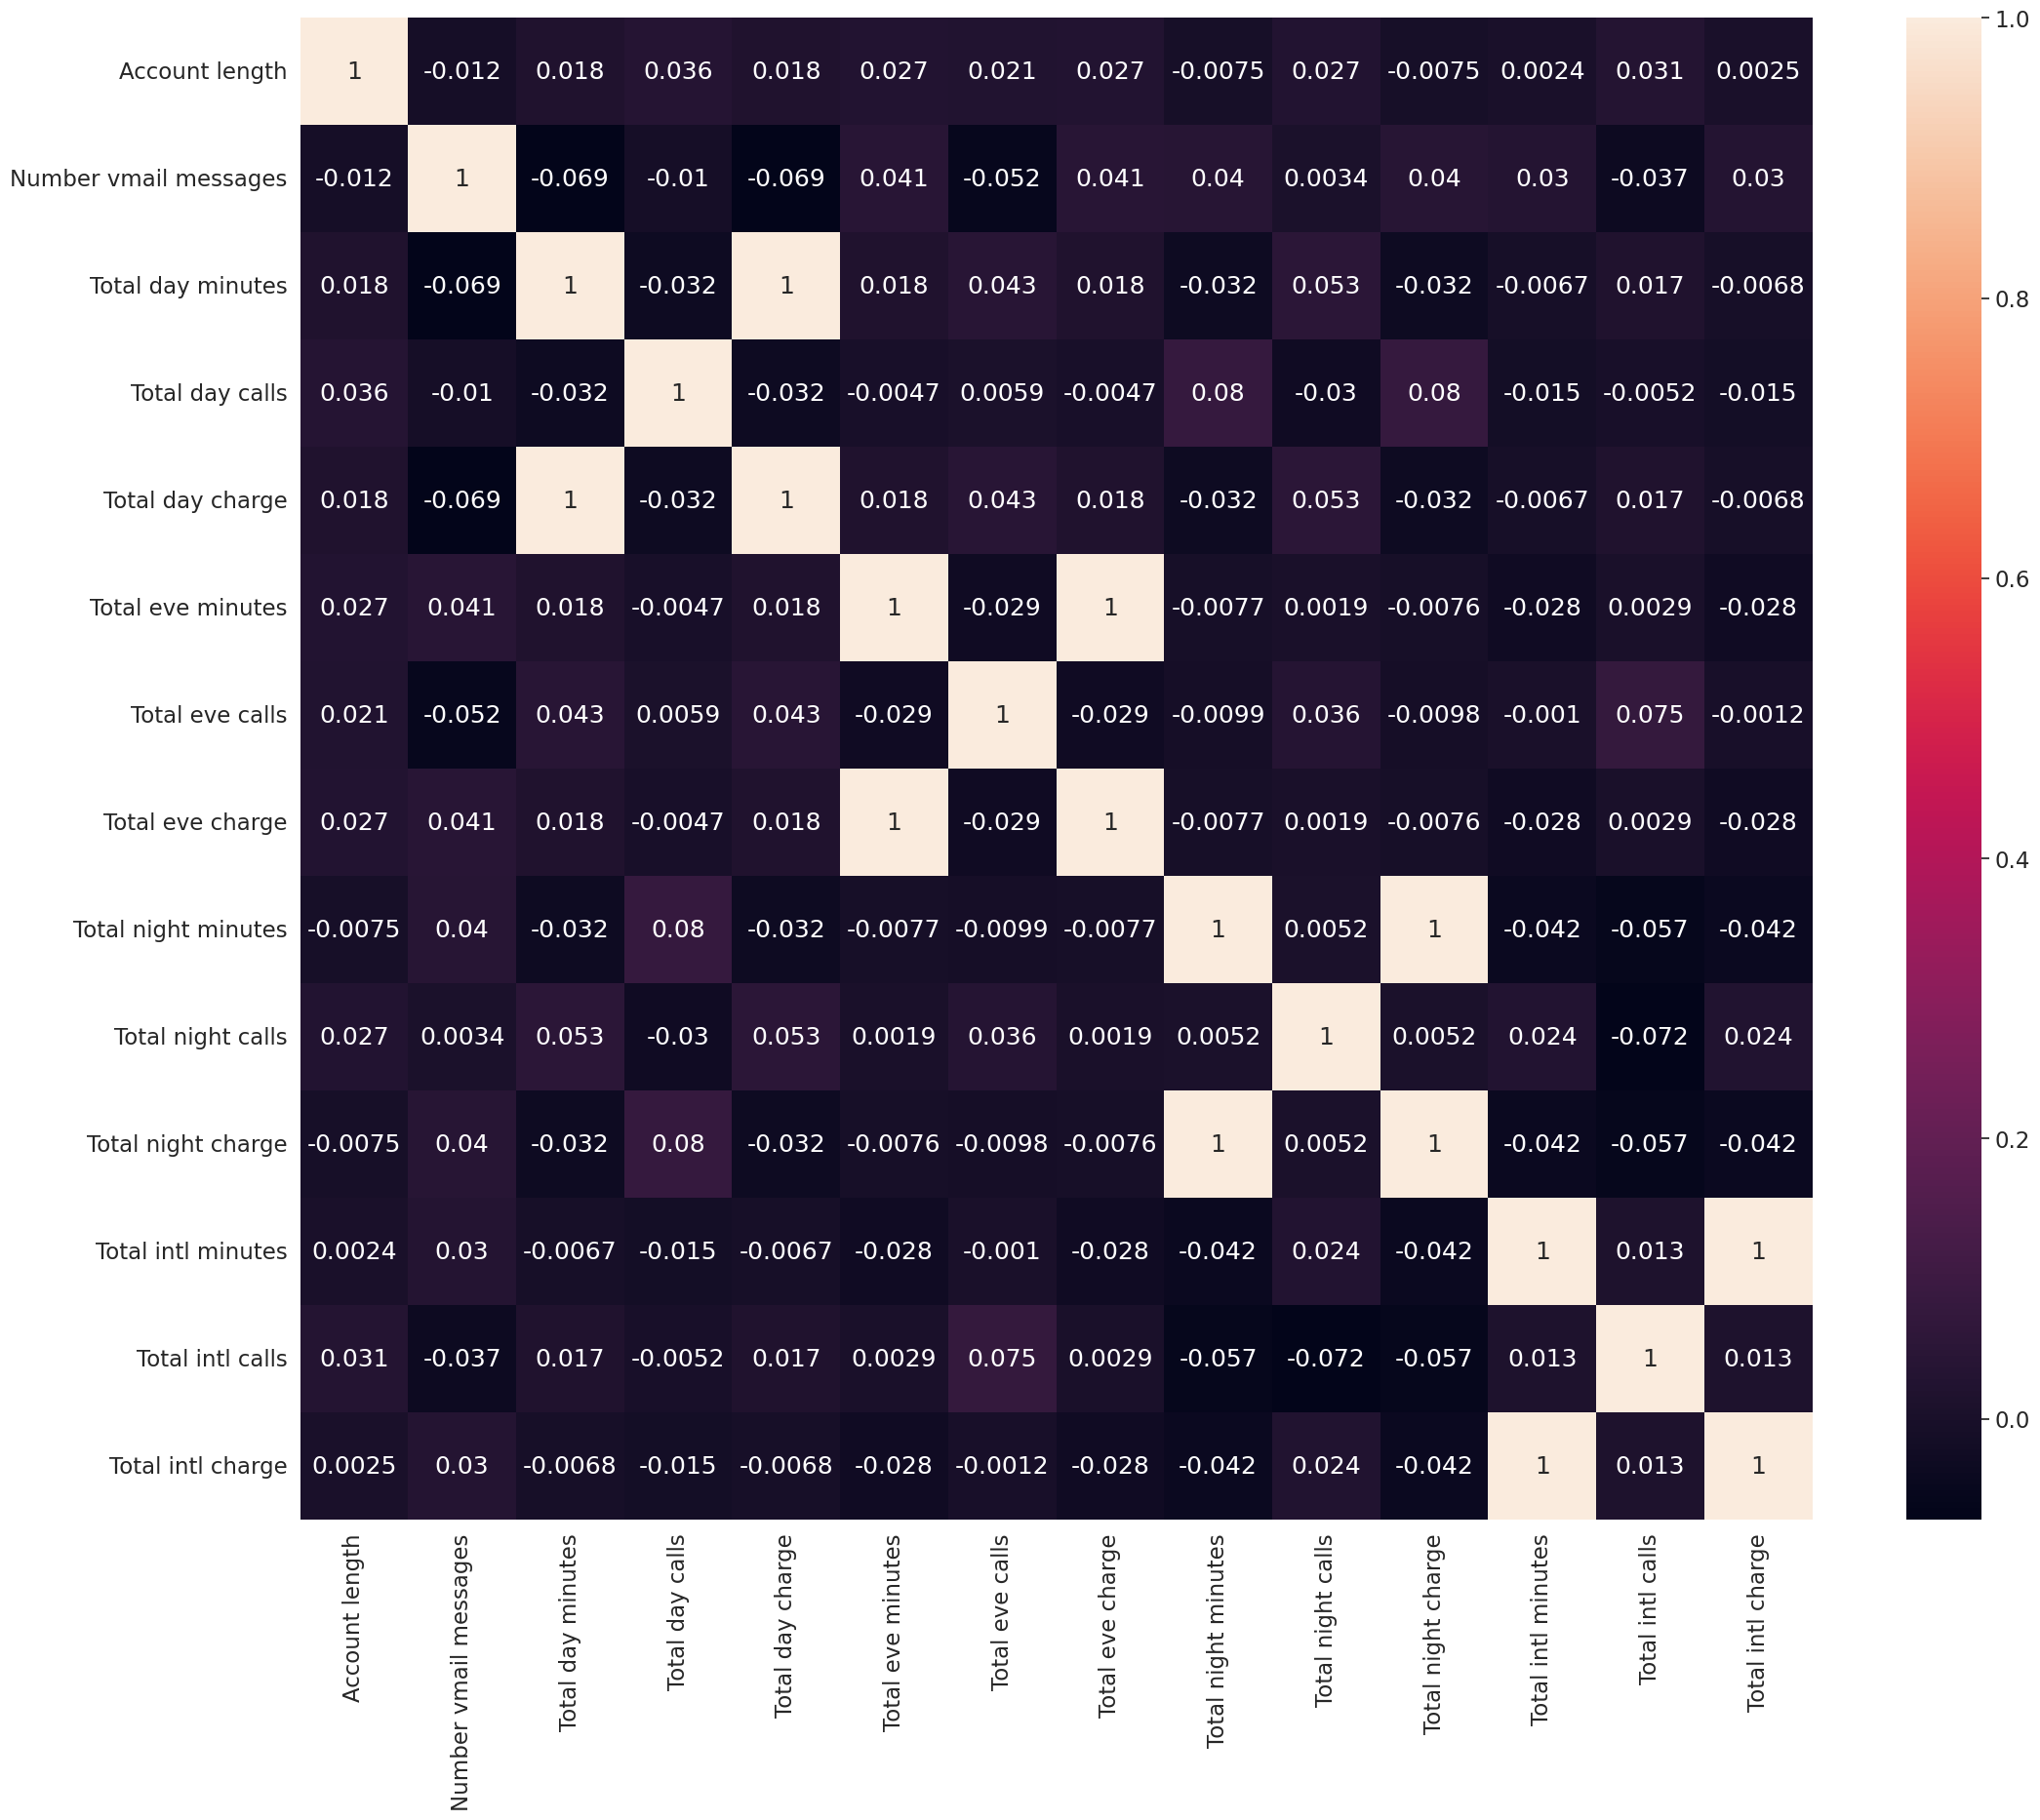

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(df[num_cols].corr(), annot = True)

In [ ]:
df[num_cols].corr()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
Account length,1.000000,-0.011993,0.017833,0.035703,0.017839,0.027043,0.021237,0.027051,-0.007527,0.027228,-0.007528,0.002362,0.031279,0.002456
Number vmail messages,-0.011993,1.000000,-0.069172,-0.009952,-0.069187,0.040865,-0.051951,0.040876,0.039751,0.003367,0.039680,0.029949,-0.036847,0.029999
Total day minutes,0.017833,-0.069172,1.000000,-0.032306,1.000000,0.017987,0.043219,0.017945,-0.031600,0.052761,-0.031603,-0.006725,0.016597,-0.006841
Total day calls,0.035703,-0.009952,-0.032306,1.000000,-0.032319,-0.004688,0.005851,-0.004664,0.079536,-0.030074,0.079529,-0.015319,-0.005155,-0.015201
Total day charge,0.017839,-0.069187,1.000000,-0.032319,1.000000,0.017983,0.043231,0.017941,-0.031613,0.052748,-0.031616,-0.006720,0.016582,-0.006836
Total eve minutes,0.027043,0.040865,0.017987,-0.004688,0.017983,1.000000,-0.029077,1.000000,-0.007705,0.001938,-0.007603,-0.027855,0.002929,-0.027887
Total eve calls,0.021237,-0.051951,0.043219,0.005851,0.043231,-0.029077,1.000000,-0.029089,-0.009856,0.036068,-0.009833,-0.001050,0.074829,-0.001152
Total eve charge,0.027051,0.040876,0.017945,-0.004664,0.017941,1.000000,-0.029089,1.000000,-0.007691,0.001939,-0.007589,-0.027863,0.002894,-0.027895
Total night minutes,-0.007527,0.039751,-0.031600,0.079536,-0.031613,-0.007705,-0.009856,-0.007691,1.000000,0.005209,0.999999,-0.041969,-0.057212,-0.042221
Total night calls,0.027228,0.003367,0.052761,-0.030074,0.052748,0.001938,0.036068,0.001939,0.005209,1.000000,0.005195,0.024038,-0.072354,0.023863


In [ ]:
to_drop = ["Total day minutes", "Total eve charge", "Total night minutes", "Total intl minutes"]


<Axes: >

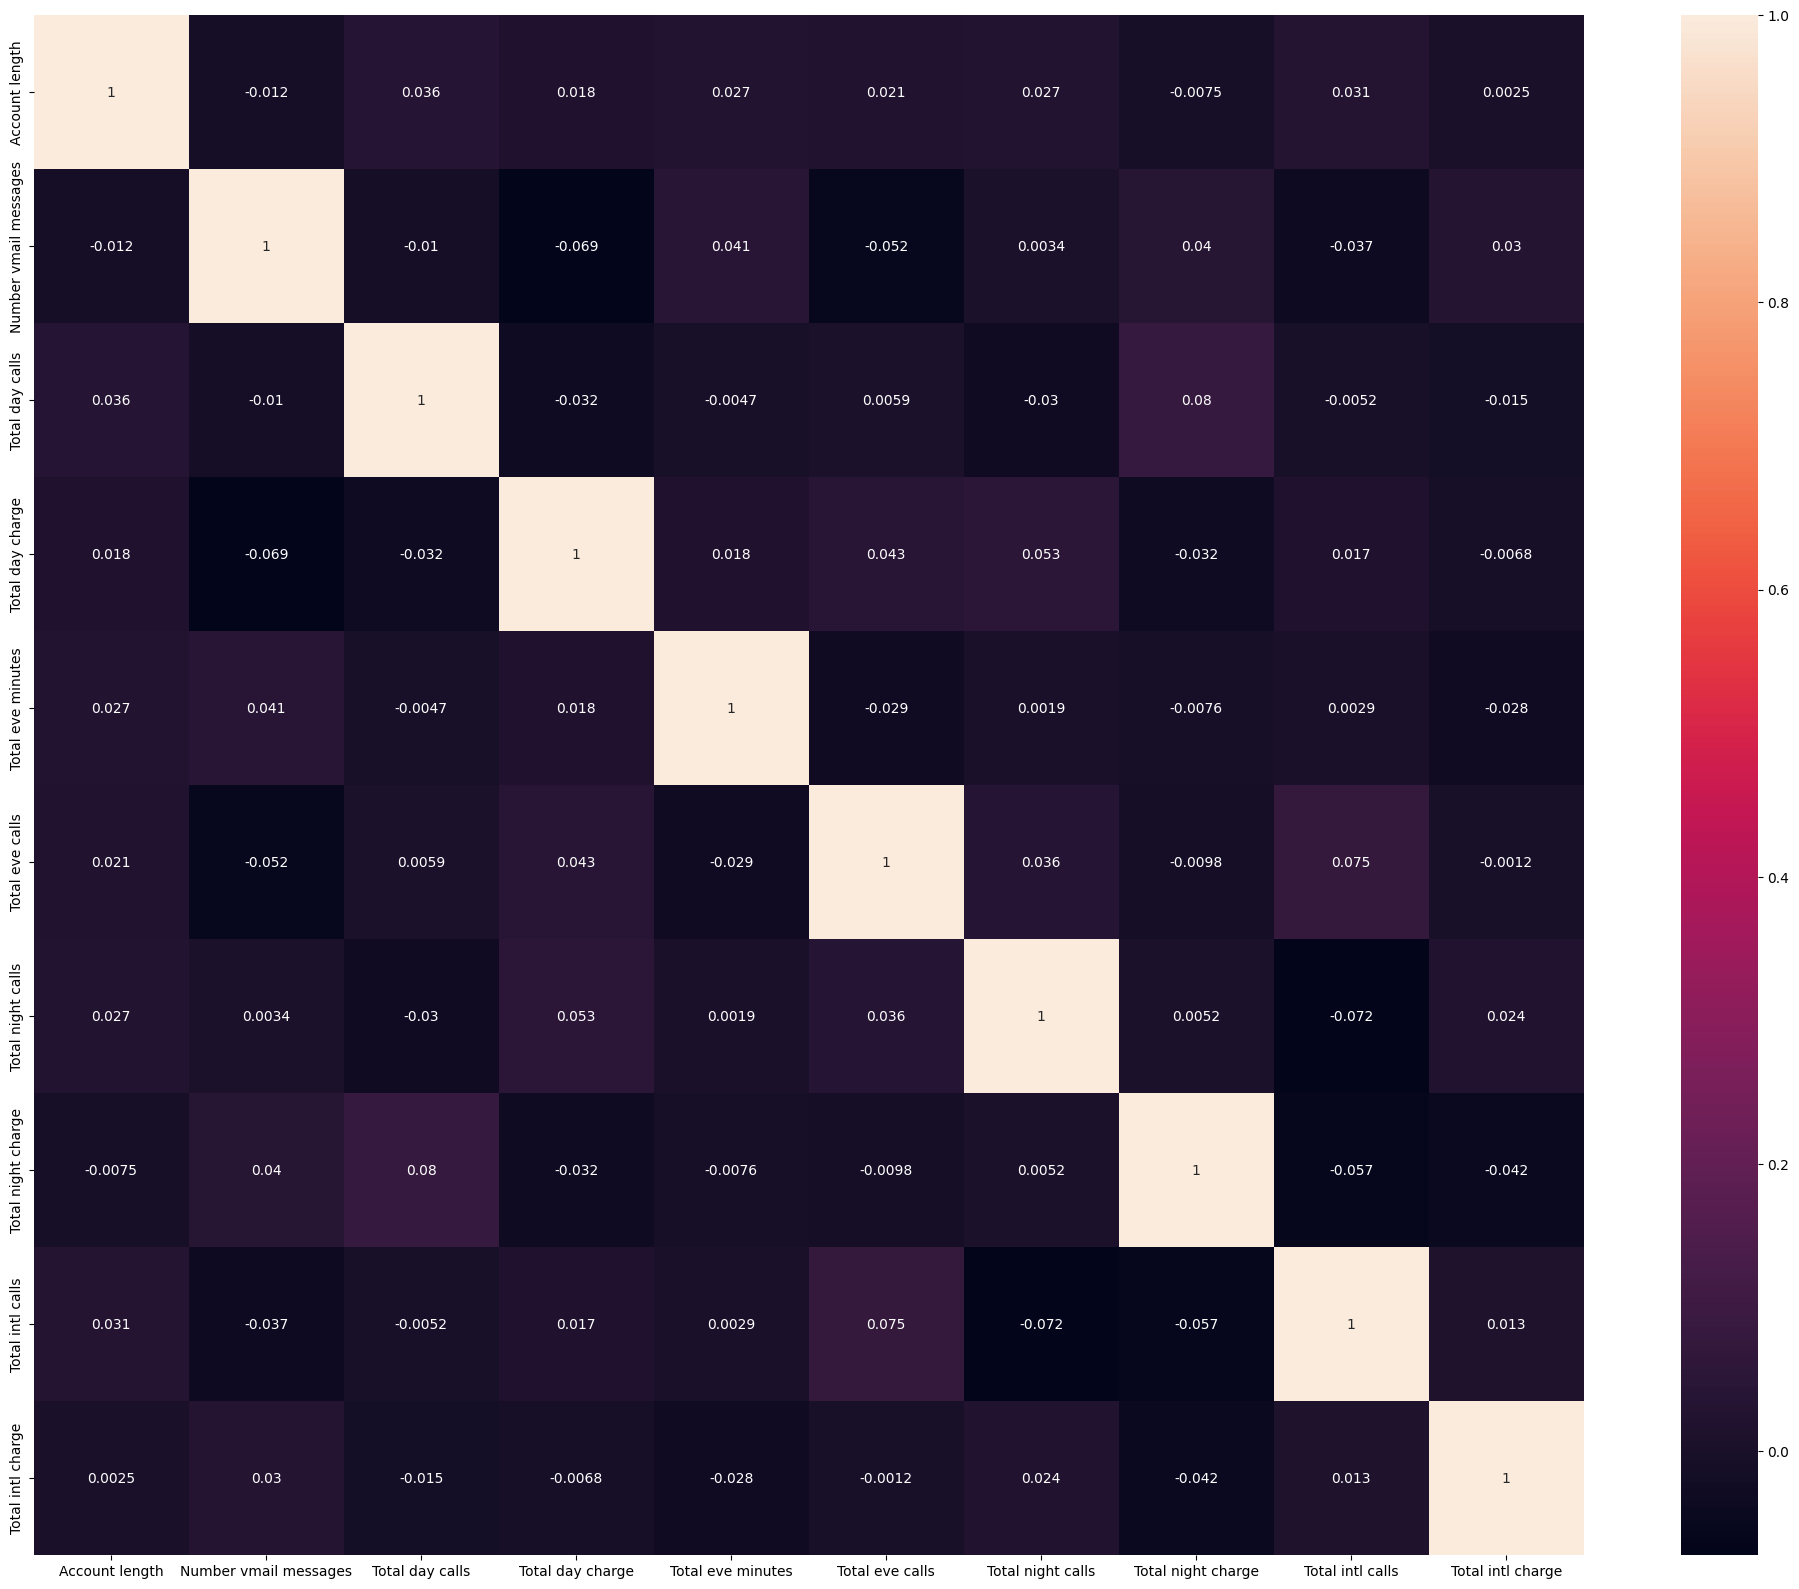

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(df[num_cols].drop(to_drop, axis = 1).corr(), annot = True)

In [ ]:
df.replace(["No","Yes"],[0,1], inplace = True)
df.replace([False,True],[0,1], inplace = True)

In [ ]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)


In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class FeatureCreator(BaseEstimator, TransformerMixin):
    """
    Transformer to create new features
    """
    def __init__(self,to_drop):
        self.to_drop = to_drop
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["Total number of minutes"] = X["Total day minutes"] + X["Total eve minutes"] + X["Total night minutes"]
        X["Total minutes per call"] = (X["Total number of minutes"]) / (X["Total day calls"] + X["Total eve calls"] + X["Total night calls"])
        X["Average charge per call"] = (X["Total day charge"] + X["Total eve charge"] + X["Total night charge"]) / (X["Total number of minutes"])
        X["International usage rate"] = (X["Total intl minutes"]) / (X["Total number of minutes"])

        return X.drop(self.to_drop, axis = 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

class Scaling(BaseEstimator, TransformerMixin):
    """
    Transformer to return a scaled dataframe
    """
    def __init__(self,num_columns,cat_columns,onehot_columns, scaler=StandardScaler()):
        self.scaler = scaler
        self.num_columns = num_columns
        self.cat_columns = cat_columns
        self.onehot_columns = onehot_columns
    def fit(self, X, y=None):
        self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X):
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.num_columns]),
                                columns=X[self.num_columns].columns,
                                index=X[self.num_columns].index)
        dummies = pd.get_dummies(X[self.onehot_columns].astype("object")).iloc[:,:2]
        X = pd.concat([X[self.cat_columns],X_scaled], axis = 1)
        X = pd.concat([X,dummies], axis = 1)
        return X

In [ ]:
'''x:[a,b,c,d,e]->  acolumn,bcolumn,ccolumn.dcolumn,ecolumn
x:a                 1,0,0,0,0,--->1000-0
x:e                 0,0,0,0,1---->0000-1
n distinct values ------->n-1 columns
acolumn,bcolumn,ccolumn.dcolumn'''

In [ ]:
cat_cols =["State","International plan","Voice mail plan", "Customer service calls"]
one_hot_col = ["Area code"]
num_cols = ["Account length",
    "Number vmail messages",
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total night calls',
    'Total night charge',
    'Total intl calls',
    'Total intl charge',
    "Total number of minutes",
    "Total minutes per call",
    "Average charge per call",
    "International usage rate"]

In [ ]:
X_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
551,1,178,415,0,1,35,175.4,88,29.82,190.0,65,16.15,138.7,94,6.24,10.5,3,2.84,0
46,1,106,408,0,1,32,165.9,126,28.20,216.5,93,18.40,173.1,86,7.79,14.1,8,3.81,1
618,1,104,408,0,0,0,280.4,127,47.67,179.4,79,15.25,150.6,77,6.78,15.2,6,4.10,1
445,VA,121,415,0,0,0,134.1,112,22.80,195.1,104,16.58,159.6,139,7.18,10.5,2,2.84,0
305,2,127,510,0,0,0,239.8,107,40.77,128.9,121,10.96,249.9,110,11.25,11.3,5,3.05,0


In [ ]:
pipeline = Pipeline(steps=[('feature_creation', FeatureCreator(to_drop)),('scaling', Scaling(num_cols,cat_cols,one_hot_col))
                               ])

In [ ]:
X_train_wf = pipeline.fit_transform(X_train)
X_test_wf = pipeline.transform(X_test)

<ipython-input-115-b2c645dd6c82>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(X[self.onehot_columns].astype("object")).iloc[:,:2]
<ipython-input-115-b2c645dd6c82>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(X[self.onehot_columns].astype("object")).iloc[:,:2]


In [ ]:
X_train_wf.head()

,State,International plan,Voice mail plan,Customer service calls,Account length,Number vmail messages,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total night calls,Total night charge,Total intl calls,Total intl charge,Total number of minutes,Total minutes per call,Average charge per call,International usage rate,Area code_408,Area code_415
551,1,0,1,0,1.837756,1.983109,-0.629192,-0.103852,-0.254049,-1.902520,-0.276436,-1.194679,-0.633742,0.091811,-0.878622,0.218989,0.679576,0.480509,0,1
46,1,0,1,1,0.069707,1.763891,1.187956,-0.274002,0.279870,-0.420542,-0.678318,-0.512485,1.381678,1.352223,-0.304915,-0.361228,0.036462,1.266200,1,0
618,1,0,0,1,0.020594,-0.574437,1.235775,1.770944,-0.467616,-1.161531,-1.130436,-0.957011,0.575510,1.729047,0.307857,0.525508,1.886120,1.183231,1,0
445,VA,0,0,0,0.438050,-0.574437,0.518480,-0.841167,-0.151294,0.161663,1.984154,-0.780961,-1.036826,0.091811,-1.049395,-1.535540,-0.265621,0.593009,0,1
305,2,0,0,0,0.585388,-0.574437,0.279382,1.046233,-1.485085,1.061435,0.527330,1.010347,0.172426,0.364684,0.399383,-0.337800,0.479539,0.038403,0,0


In [ ]:
X_test_wf.head()

,State,International plan,Voice mail plan,Customer service calls,Account length,Number vmail messages,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total night calls,Total night charge,Total intl calls,Total intl charge,Total number of minutes,Total minutes per call,Average charge per call,International usage rate,Area code_408,Area code_415
578,1,1,0,0,1.272963,-0.574437,2.144349,1.242640,-1.009595,0.214591,0.225918,-1.009826,0.172426,-0.090104,-0.350678,-1.069583,1.741240,0.015730,1,0
549,2,0,0,0,-0.544200,-0.574437,-2.541979,2.561825,0.680814,-1.002748,-1.080201,-0.226404,0.172426,1.001387,1.851508,4.337518,1.618646,-0.094473,0,1
657,0,0,1,0,-1.354556,1.398527,0.375021,-0.716181,0.445083,-0.367615,1.130153,-0.490479,-1.036826,1.027374,-0.476804,-0.782600,-0.374304,1.103548,0,1
632,0,0,1,0,-0.887987,2.421546,-0.724832,-0.116456,-0.846397,-0.420542,0.426859,-0.864585,-1.439910,1.105338,-1.029304,-0.656923,0.570286,1.599392,0,1
276,MI,0,0,0,-1.280887,-0.574437,1.331415,0.865580,2.687544,0.161663,1.431565,-0.120774,-1.439910,-0.233038,1.960892,0.378108,0.339703,-0.929704,0,1


In [ ]:
def train_predict(X_train,X_test,y_train,y_test, model):
    """
    Train and return predictions
    """
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

random_state = 123
classifiers = []
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state = random_state))
classifiers.append(CatBoostClassifier(logging_level='Silent'))

In [ ]:
classifiers

[AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=123),
                    learning_rate=0.1, random_state=123),
 RandomForestClassifier(random_state=123),
 ExtraTreesClassifier(random_state=123),
 GradientBoostingClassifier(random_state=123),
 LGBMClassifier(random_state=123),

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold,GridSearchCV, RandomizedSearchCV

kfold = StratifiedKFold(5)

In [ ]:
X_test_wf.State.unique()

array([1, 2, 0, 'MI', 'VA', 'DE', 'NY', 'NV'], dtype=object)

In [ ]:
X_train_wf.loc[(X_train_wf.State =='MI' ),'State']=0
X_train_wf.loc[(X_train_wf.State =='VA' ),'State']=0
X_train_wf.loc[(X_train_wf.State =='DE' ),'State']=0
X_train_wf.loc[(X_train_wf.State =='NV' ),'State']=0
X_train_wf.loc[(X_train_wf.State =='NY' ),'State']=0

X_test_wf.loc[(X_test_wf.State =='MI' ),'State']=0
X_test_wf.loc[(X_test_wf.State =='VA' ),'State']=0
X_test_wf.loc[(X_test_wf.State =='DE' ),'State']=0
X_test_wf.loc[(X_test_wf.State =='NV' ),'State']=0
X_test_wf.loc[(X_test_wf.State =='NY' ),'State']=0

In [ ]:
X_test_wf.State.unique()

array([1, 2, 0], dtype=object)

In [ ]:
X_test_wf.dtypes

State                        object
International plan            int64
Voice mail plan               int64
Customer service calls        int64
Account length              float64
Number vmail messages       float64
Total day calls             float64
Total day charge            float64
Total eve minutes           float64
Total eve calls             float64
Total night calls           float64
Total night charge          float64
Total intl calls            float64
Total intl charge           float64
Total number of minutes     float64
Total minutes per call      float64
Average charge per call     float64
International usage rate    float64
Area code_408                 uint8
Area code_415                 uint8
dtype: object

In [ ]:
X_train_wf['State'] = X_train_wf['State'].astype('int')

X_test_wf['State'] = X_test_wf['State'].astype('int')

In [ ]:
X_test_wf.dtypes

State                         int64
International plan            int64
Voice mail plan               int64
Customer service calls        int64
Account length              float64
Number vmail messages       float64
Total day calls             float64
Total day charge            float64
Total eve minutes           float64
Total eve calls             float64
Total night calls           float64
Total night charge          float64
Total intl calls            float64
Total intl charge           float64
Total number of minutes     float64
Total minutes per call      float64
Average charge per call     float64
International usage rate    float64
Area code_408                 uint8
Area code_415                 uint8
dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score,fbeta_score

accuracy = []
precision = []
recall = []
f1 = []
f2 =[]
roc_auc = []


In [ ]:
for classifier in classifiers :
    y_pred = cross_val_predict(classifier,X_train_wf,y_train, cv = kfold)
    accuracy.append(accuracy_score(y_pred,y_train))
    precision.append(precision_score(y_pred,y_train))
    recall.append(recall_score(y_pred,y_train))
    f1.append(f1_score(y_pred,y_train))
    f2.append(fbeta_score(y_pred,y_train, beta = 2))
    roc_auc.append(roc_auc_score(y_pred,y_train))

In [ ]:
index = ["AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","LGBMClassifier","CatBoostClassifier"]
df = pd.DataFrame({"Accuracy" : accuracy, "Precision" : precision, "Recall" : recall, "f1" : f1, "f2" : f2, "roc_auc" : roc_auc})
df.index = index

In [ ]:
df.sort_values(["f2"],ascending = False)


,Accuracy,Precision,Recall,f1,f2,roc_auc
RandomForest,0.908068,0.407895,0.885714,0.558559,0.717593,0.897676
GradientBoosting,0.911820,0.539474,0.773585,0.635659,0.711806,0.850334
ExtraTrees,0.904315,0.421053,0.820513,0.556522,0.689655,0.865722
CatBoostClassifier,0.904315,0.447368,0.790698,0.571429,0.685484,0.852492
LGBMClassifier,0.902439,0.447368,0.772727,0.566667,0.674603,0.843419
AdaBoost,0.896811,0.605263,0.647887,0.625850,0.638889,0.791476


In [ ]:
rfc_clf = RandomForestClassifier()

rf_param_grid = {"max_features": [10,15,19],
              "min_samples_split": [5,10],
              "n_estimators" :[1000,2000]}


grid = GridSearchCV(rfc_clf,param_grid = rf_param_grid, cv=kfold, scoring="f1", n_jobs= 4)

grid.fit(X_train_wf,y_train)

rfc_best = grid.best_estimator_

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_features': 19, 'min_samples_split': 10, 'n_estimators': 1000}
0.6793464599916212


In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_features': 19, 'min_samples_split': 10, 'n_estimators': 1000}
0.6793464599916212


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'depth'         : [7, 10],
                'learning_rate' : [0.01,0.02,0.04],
                'iterations'    : [70,90,100]
                 }
grid = GridSearchCV(CatBoostClassifier(logging_level ="Silent"),  scoring="f1", verbose = 3, param_grid = parameters, cv = kfold)
grid.fit(X_train_wf,y_train)

cat_best = grid.best_estimator_

# Best score
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END depth=7, iterations=70, learning_rate=0.01;, score=0.333 total time=   1.0s
[CV 2/5] END depth=7, iterations=70, learning_rate=0.01;, score=0.235 total time=   1.0s
[CV 3/5] END depth=7, iterations=70, learning_rate=0.01;, score=0.316 total time=   0.7s
[CV 4/5] END depth=7, iterations=70, learning_rate=0.01;, score=0.476 total time=   0.3s
[CV 5/5] END depth=7, iterations=70, learning_rate=0.01;, score=0.421 total time=   0.3s
[CV 1/5] END depth=7, iterations=70, learning_rate=0.02;, score=0.400 total time=   0.3s
[CV 2/5] END depth=7, iterations=70, learning_rate=0.02;, score=0.421 total time=   0.3s
[CV 3/5] END depth=7, iterations=70, learning_rate=0.02;, score=0.316 total time=   0.3s
[CV 4/5] END depth=7, iterations=70, learning_rate=0.02;, score=0.609 total time=   0.3s
[CV 5/5] END depth=7, iterations=70, learning_rate=0.02;, score=0.421 total time=   0.3s
[CV 1/5] END depth=7, iterations=70, learning_rat

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       115
           1       1.00      0.63      0.77        19

    accuracy                           0.95       134
   macro avg       0.97      0.82      0.87       134
weighted avg       0.95      0.95      0.94       134



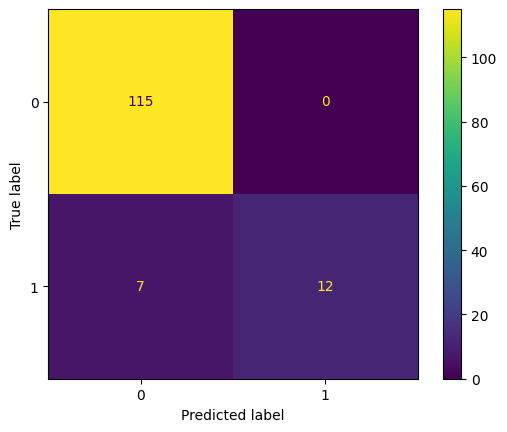

In [ ]:
y_pred = train_predict(X_train_wf,X_test_wf,y_train,y_test,cat_best)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))


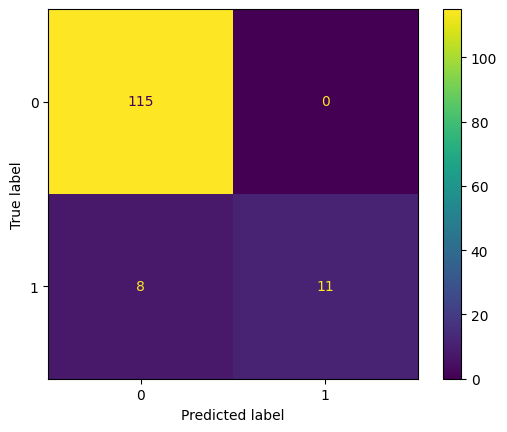

In [ ]:
y_pred = train_predict(X_train_wf,X_test_wf,y_train,y_test,LGBMClassifier(random_state = random_state))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

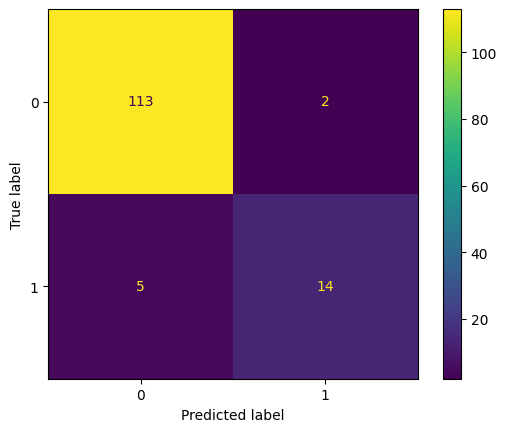

In [ ]:
y_pred = train_predict(X_train_wf,X_test_wf,y_train,y_test,rfc_best)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()